In [1]:
import pandas as pd
 df = pd.read_csv(r"C:\Users\Fardin\Downloads\amazon_prime_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Fardin\Downloads\amazon_prime_titles.csv")



In [3]:
# Display the first few rows
print("Dataset Overview:")
print(df.head())


Dataset Overview:
  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min 

In [4]:
# 3. Exploratory Data Analysis (EDA)
# Univariate Analysis
print("\nCount of Movies and TV Shows:")
print(df['type'].value_counts())




Count of Movies and TV Shows:
Movie      7814
TV Show    1854
Name: type, dtype: int64


In [5]:
# Top genres
print("\nTop 10 Genres:")
print(df['listed_in'].value_counts().head(10))





Top 10 Genres:
Drama                            986
Comedy                           536
Drama, Suspense                  399
Comedy, Drama                    377
Animation, Kids                  356
Documentary                      350
Kids                             334
Action, Drama                    297
Documentary, Special Interest    296
TV Shows                         263
Name: listed_in, dtype: int64


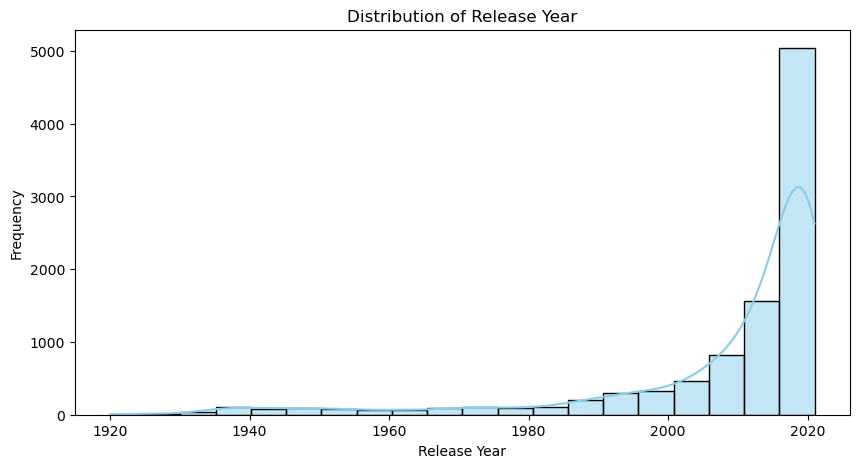

In [6]:
# Distribution of release years
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'], bins=20, kde=True, color="skyblue")
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()



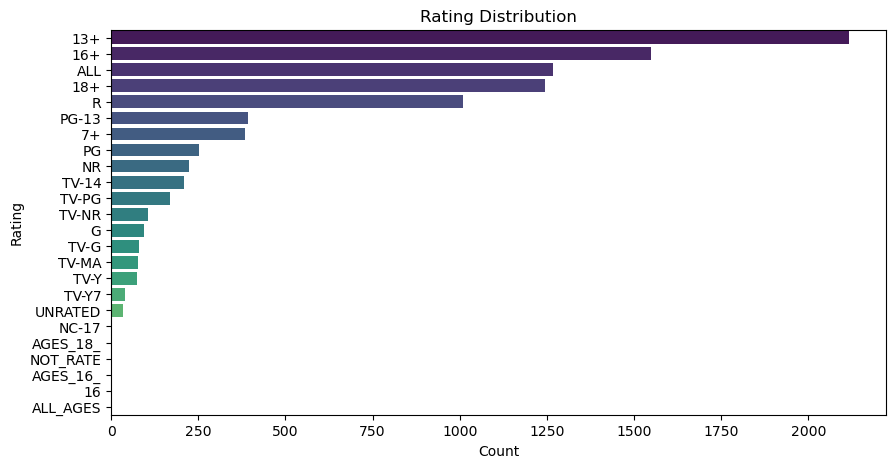

In [7]:
# Rating distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="viridis")
plt.title('Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()



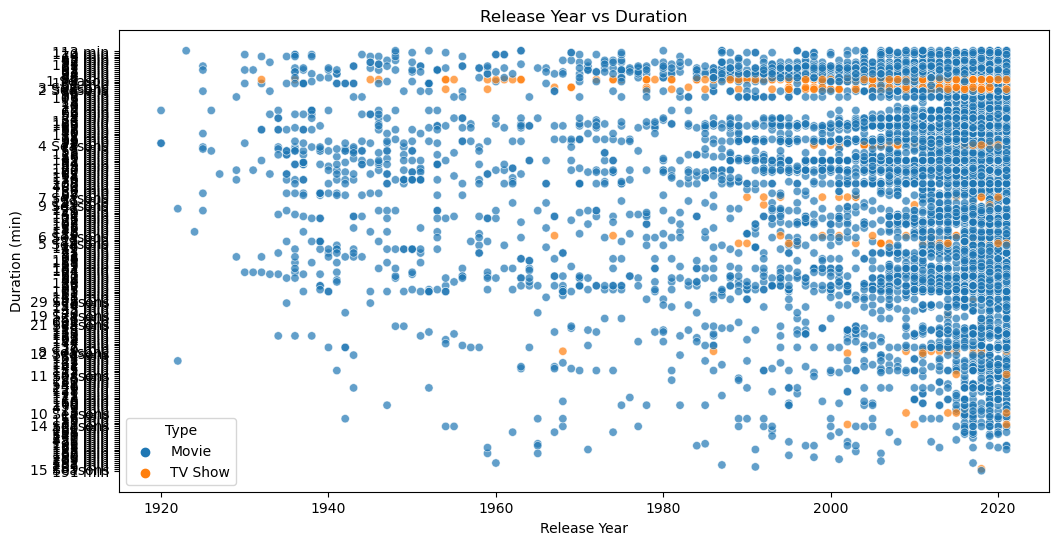

In [8]:
# Bivariate Analysis
# Release year vs duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='duration', hue='type', data=df, alpha=0.7)
plt.title('Release Year vs Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.legend(title='Type')
plt.show()



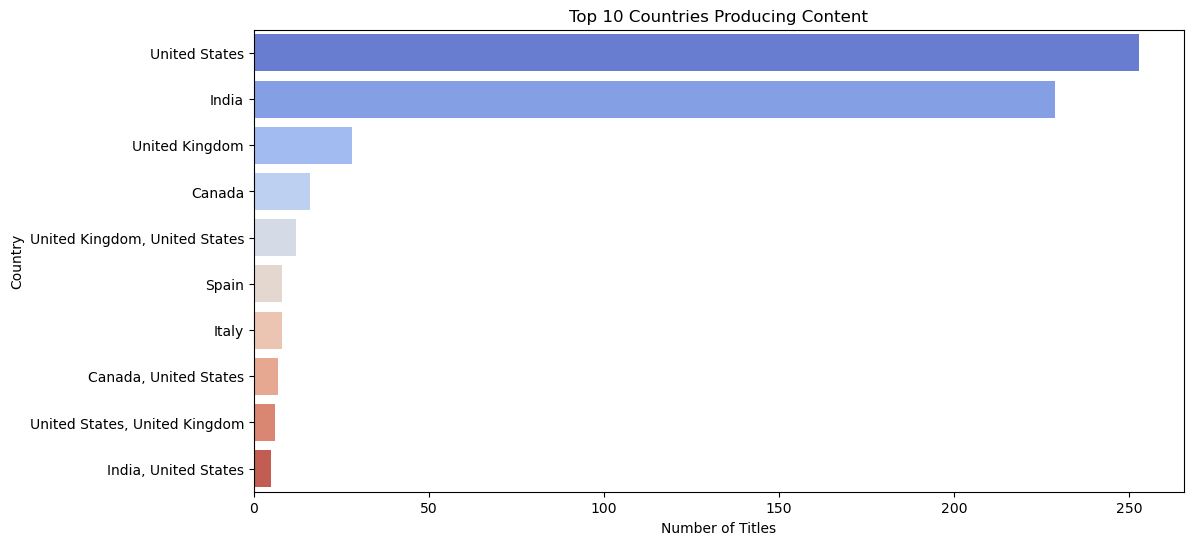

In [9]:
# Top countries producing content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


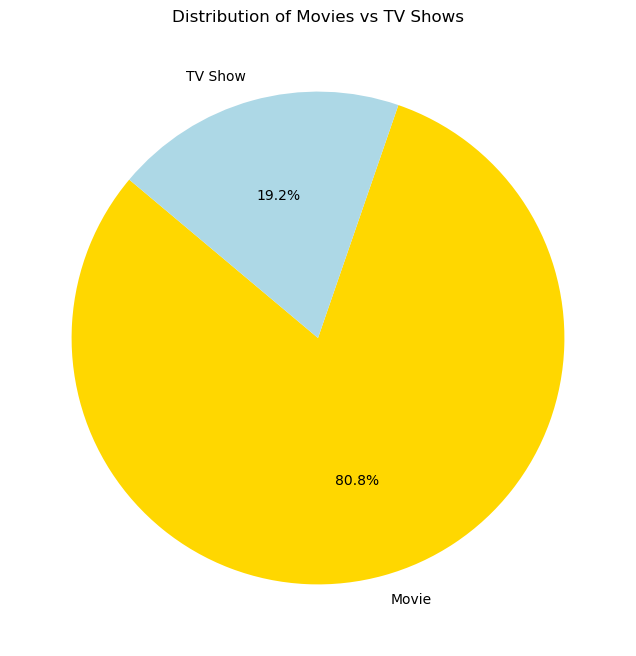

In [10]:

# Movie vs TV Show distribution
plt.figure(figsize=(8, 8))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=["gold", "lightblue"])
plt.title('Distribution of Movies vs TV Shows')
plt.ylabel('')
plt.show()



In [11]:
# 4. Insights
# Top directors
top_directors = df['director'].value_counts().head(10)
print("\nTop 10 Directors:")
print(top_directors)

# Top actors
top_cast = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
print("\nTop 10 Actors:")
print(top_cast)




Top 10 Directors:
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: director, dtype: int64

Top 10 Actors:
Maggie Binkley        56
1                     35
Gene Autry            32
Nassar                30
Champion              29
Anne-Marie Newland    25
Prakash Raj           24
John Wayne            23
Roy Rogers            23
Danny Trejo           22
dtype: int64


<Figure size 1200x600 with 0 Axes>

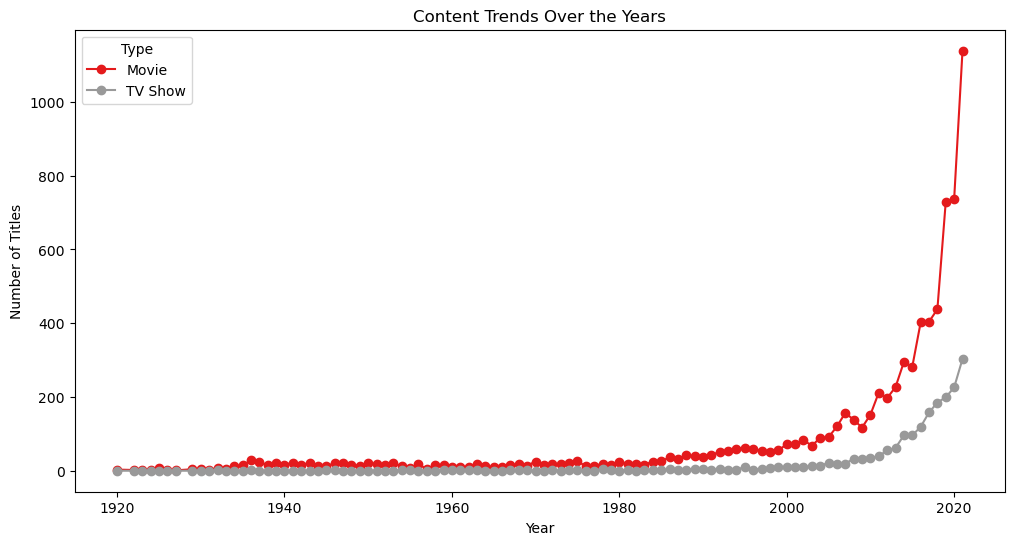

In [12]:
# 5. Trends over the years
plt.figure(figsize=(12, 6))
content_trend = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
content_trend.plot(kind='line', figsize=(12, 6), marker='o', colormap='Set1')
plt.title('Content Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()
